### Modelación y Simulación - Laboratorio 7
+ Sebastían García 22291
+ Ana Laura Tschen 221645

### Ejercicio 1

ESTADÍSTICOS - GRUPO 1
Media: 0.5030947903815657
Var: 0.08245053341134126


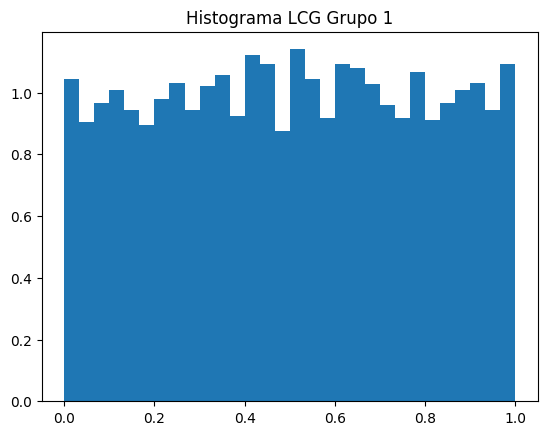

KS: 0.010832046864926809    p-value: 0.5964920104834444

ESTADÍSTICOS - GRUPO 2
Media: 0.4970913891256281
Var: 0.08381071508879635


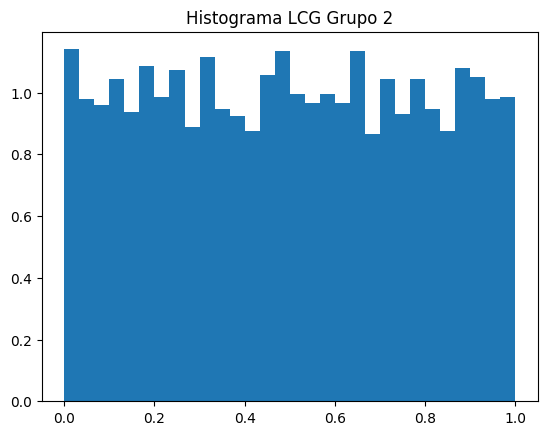

KS: 0.007975601379468844    p-value: 0.9055274752766115


In [9]:

# EJERCICIO 1
# Generador LCG - pseudoaleatorio Uniforme(0,1)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# ---- función LCG ----
def LCG(a, c, m, seed, N):
    x = seed
    nums = []
    for _ in range(N):
        x = (a*x + c) % m
        nums.append(x/m)   # normalizamos a [0,1]
    return np.array(nums)


# PARÁMETROS GRUPO 1

m1 = 2**31
a1 = 1103515245
c1 = 12345
seed1 = 42
N = 5000

sample1 = LCG(a1,c1,m1,seed1,N)

print("ESTADÍSTICOS - GRUPO 1")
print("Media:", np.mean(sample1))
print("Var:", np.var(sample1))

# Histograma
plt.hist(sample1, bins=30, density=True)
plt.title("Histograma LCG Grupo 1")
plt.show()

# Prueba KS contra U(0,1)
stat1, p1 = kstest(sample1, 'uniform')
print("KS:", stat1, "   p-value:", p1)

# PARÁMETROS GRUPO 2

m2 = 2147483647
a2 = 16807
c2 = 0
seed2 = 15

sample2 = LCG(a2,c2,m2,seed2,N)

print("\nESTADÍSTICOS - GRUPO 2")
print("Media:", np.mean(sample2))
print("Var:", np.var(sample2))

plt.hist(sample2, bins=30, density=True)
plt.title("Histograma LCG Grupo 2")
plt.show()

stat2, p2 = kstest(sample2, 'uniform')
print("KS:", stat2, "   p-value:", p2)


### Ejercicio 2

ESTADÍSTICOS - Mersenne Twister
Media: 0.5028080064756697
Var: 0.08128635309129845


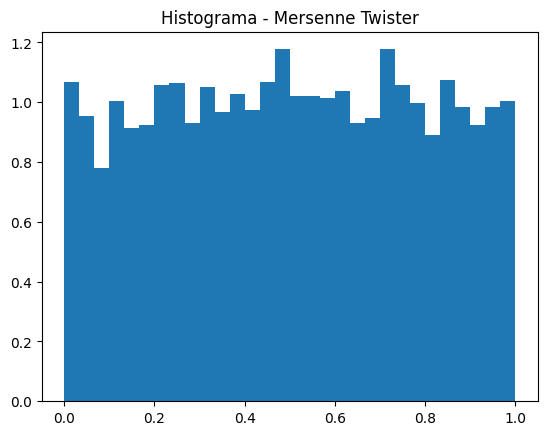

KS: 0.013095470715386415   p-value: 0.3548086009833509


In [10]:

# EJERCICIO 2
# Mersenne Twister - Uniforme(0,1)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

N = 5000

# numpy ya usa MT
np.random.seed(2025)
sample_mt = np.random.rand(N)

print("ESTADÍSTICOS - Mersenne Twister")
print("Media:", np.mean(sample_mt))
print("Var:", np.var(sample_mt))

plt.hist(sample_mt, bins=30, density=True)
plt.title("Histograma - Mersenne Twister")
plt.show()

stat_mt, p_mt = kstest(sample_mt, 'uniform')
print("KS:", stat_mt, "  p-value:", p_mt)


### Ejercicio 3

In [11]:
import numpy as np
import math
def uniforms_to_bits(u):
    return (u >= 0.5).astype(int)

# Prueba de frecuencia (Monobit)
def nist_frequency_monobit(bits):
    n = len(bits)
    s = np.sum(2*bits - 1)          
    sobs = abs(s) / math.sqrt(n)
    p_value = math.erfc(sobs / math.sqrt(2))
    return sobs, p_value

# Prueba de corridas (Runs)
def nist_runs(bits):
    n = len(bits)
    pi = np.mean(bits)
    if abs(pi - 0.5) >= (2 / math.sqrt(n)):
        return None, 0.0  
    v_obs = 1 + np.sum(bits[1:] != bits[:-1])
    p_value = math.erfc(abs(v_obs - 2*n*pi*(1-pi)) /
                        (2*math.sqrt(2*n)*pi*(1-pi)))
    return v_obs, p_value

np.random.seed(2025)
N_bits = 1_000_000
u = np.random.rand(N_bits)
bits = uniforms_to_bits(u)

sobs, p_freq = nist_frequency_monobit(bits)
v_obs, p_runs = nist_runs(bits)

print("=== NIST subset - Mersenne Twister ===")
print("Monobit -> estadístico:", sobs, "  p-value:", p_freq)
print("Runs    -> estadístico:", v_obs, "  p-value:", p_runs)

=== NIST subset - Mersenne Twister ===
Monobit -> estadístico: 0.078   p-value: 0.9378280529939508
Runs    -> estadístico: 500427   p-value: 0.3931016155028068


### Ejercicio 4

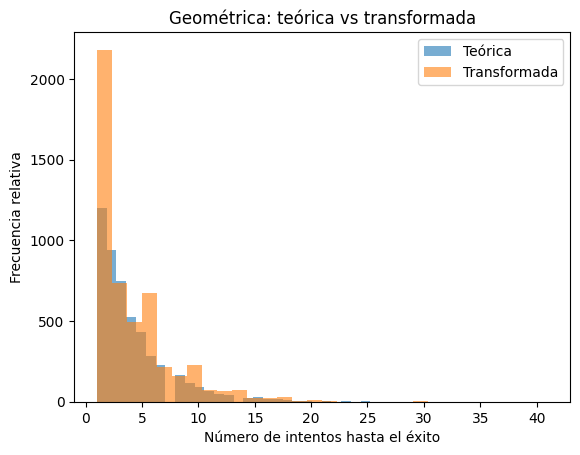


Chi-cuadrado: estadístico = 600000026.3718,  p-value = 0.0000

Kolmogorov–Smirnov: D = 0.0096,  p-value = 0.9753
Se rechaza H0: hay diferencias significativas entre las muestras.


In [12]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare, ks_2samp

def geom_inverse_transform(p, N):
    U = np.random.rand(N)
    X = np.ceil(np.log(1 - U) / np.log(1 - p))
    return X.astype(int)

p = 0.25
N = 5000
np.random.seed(2025)

geom_theoretical = np.random.geometric(p, size=N)
geom_empirical   = geom_inverse_transform(p, N)

plt.hist(geom_theoretical, bins=30, alpha=0.6, label="Teórica")
plt.hist(geom_empirical, bins=30, alpha=0.6, label="Transformada")
plt.legend()
plt.title("Geométrica: teórica vs transformada")
plt.xlabel("Número de intentos hasta el éxito")
plt.ylabel("Frecuencia relativa")
plt.show()

max_len = int(max(geom_theoretical.max(), geom_empirical.max())) + 1
f_obs = np.bincount(geom_empirical, minlength=max_len)
f_exp = np.bincount(geom_theoretical, minlength=max_len)
f_exp = np.where(f_exp == 0, 1e-8, f_exp)
chi_stat, chi_p = chisquare(f_obs=f_obs, f_exp=f_exp)
ks_stat, ks_p = ks_2samp(geom_theoretical, geom_empirical)
print(f"\nChi-cuadrado: estadístico = {chi_stat:.4f},  p-value = {chi_p:.4f}")
print(f"\nKolmogorov–Smirnov: D = {ks_stat:.4f},  p-value = {ks_p:.4f}")


if chi_p > 0.05 and ks_p > 0.05:
    print("No se rechaza H0: ambas muestras provienen de la misma distribución geométrica.")
else:
    print("Se rechaza H0: hay diferencias significativas entre las muestras.")

### Ejercicio 5

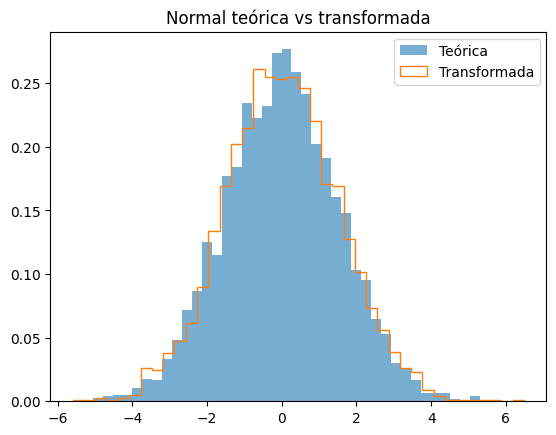

KS: 0.013   p-value: 0.7920669467755587


In [13]:

def norm_ppf_acklam(p):
    a = [-3.969683028665376e+01, 2.209460984245205e+02,
         -2.759285104469687e+02, 1.383577518672690e+02,
         -3.066479806614716e+01, 2.506628277459239e+00]
    b = [-5.447609879822406e+01, 1.615858368580409e+02,
         -1.556989798598866e+02, 6.680131188771972e+01,
         -1.328068155288572e+01]
    c = [-7.784894002430293e-03, -3.223964580411365e-01,
         -2.400758277161838e+00, -2.549732539343734e+00,
          4.374664141464968e+00,  2.938163982698783e+00]
    d = [7.784695709041462e-03, 3.224671290700398e-01,
         2.445134137142996e+00, 3.754408661907416e+00]
    plow, phigh = 0.02425, 1 - 0.02425
    x = np.zeros_like(p)
    mask = p < plow
    q = np.sqrt(-2*np.log(p[mask]))
    x[mask] = (((((c[0]*q+c[1])*q+c[2])*q+c[3])*q+c[4])*q+c[5]) / \
               ((((d[0]*q+d[1])*q+d[2])*q+d[3])*q+1)
    mask = (p >= plow) & (p <= phigh)
    q = p[mask] - 0.5
    r = q*q
    x[mask] = (((((a[0]*r+a[1])*r+a[2])*r+a[3])*r+a[4])*r+a[5])*q / \
               (((((b[0]*r+b[1])*r+b[2])*r+b[3])*r+b[4])*r+1)
    mask = p > phigh
    q = np.sqrt(-2*np.log(1 - p[mask]))
    x[mask] = -(((((c[0]*q+c[1])*q+c[2])*q+c[3])*q+c[4])*q+c[5]) / \
                ((((d[0]*q+d[1])*q+d[2])*q+d[3])*q+1)
    return x

def normal_inverse_transform(mu, sigma, N):
    U = np.random.rand(N)
    Z = norm_ppf_acklam(U)
    return mu + sigma*Z

np.random.seed(2025)
N = 5000
mu, sigma = 0, 1.5

normal_theoretical = np.random.normal(mu, sigma, N)
normal_empirical = normal_inverse_transform(mu, sigma, N)

plt.hist(normal_theoretical, bins=40, density=True, alpha=0.6, label="Teórica")
plt.hist(normal_empirical, bins=40, density=True, histtype="step", label="Transformada")
plt.legend(); plt.title("Normal teórica vs transformada"); plt.show()

ks_stat, ks_p = ks_2samp(normal_theoretical, normal_empirical)
print("KS:", ks_stat, "  p-value:", ks_p)